<a href="https://colab.research.google.com/github/Tadalan-Ace-Marlou-R/CPE-031-Visualizations-and-Data-Analysis/blob/main/Tadalan_HOA_9_Exploring_Data_Visually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ace Tadalan

CpE21S1

#**Exploring Data Visually**





---



**Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


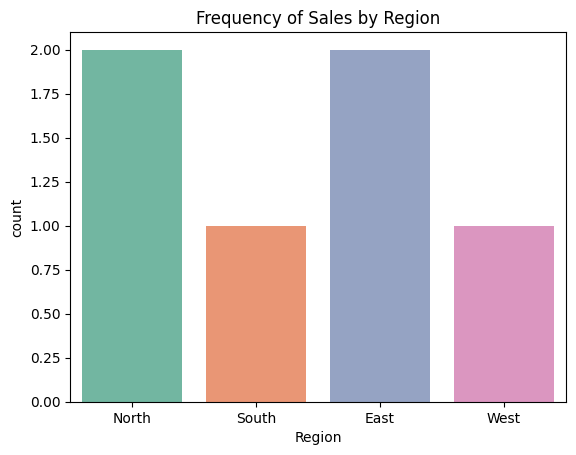

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


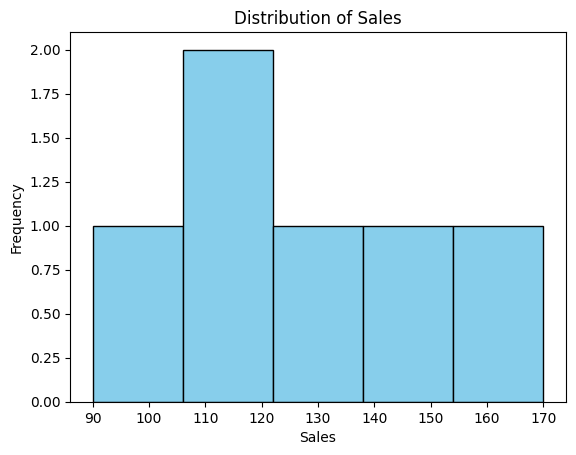

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-1612588635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set1")


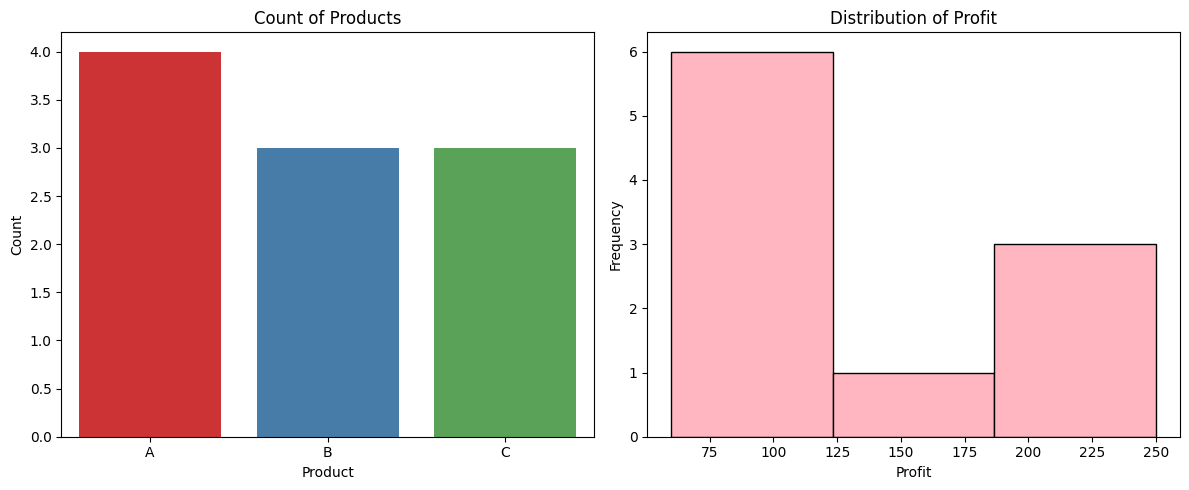


Interpretation:
Countplot of Product: The plot shows the frequency for each included products in the dataset.
Histogram of Profit: The plot demonstrate a perfect visualization for the distribution of profit values. The patter shows by the histogram indicates how often different profit ranges may occur.


In [ ]:
#Code here
# Create one countplot for Product
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="Product", data=df, palette="Set1")
plt.title("Count of Products")
plt.xlabel("Product")
plt.ylabel("Count")

# Create one histogram for Profit
plt.subplot(1, 2, 2)
plt.hist(df["Profit"], bins=3, color="lightpink", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation:")
print("Countplot of Product: The plot shows the frequency for each included products in the dataset.")
print("Histogram of Profit: The plot demonstrate a perfect visualization for the distribution of profit values. The patter shows by the histogram indicates how often different profit ranges may occur.")

Section 2: Relationships Between Variables

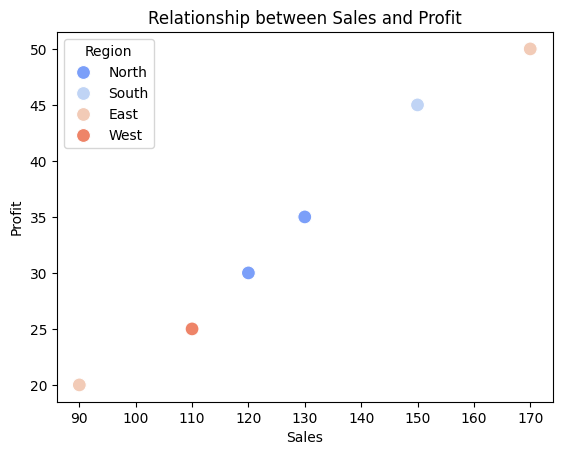

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

*Answer here

As the table shows, both do perform well since they got the highest number for each product.

Section 3: Analysis of Missing Data

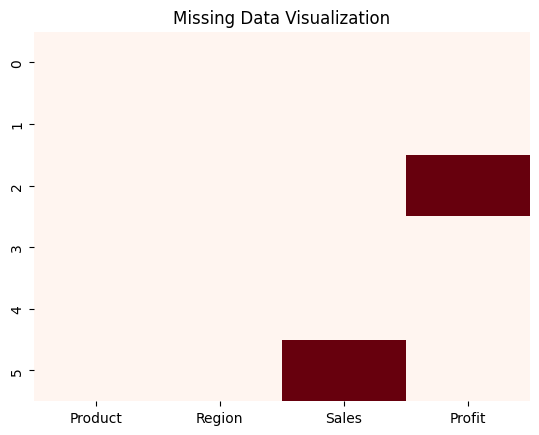

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

*Answer here

For me this type of visualization, do lack of description, which makes us intentionally focus more on the provided variables, such as the sales and profit.

Section 4: Visualizing Time-Series Data

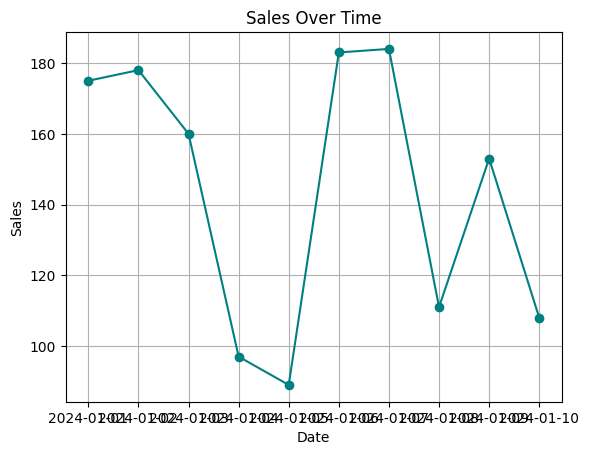

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

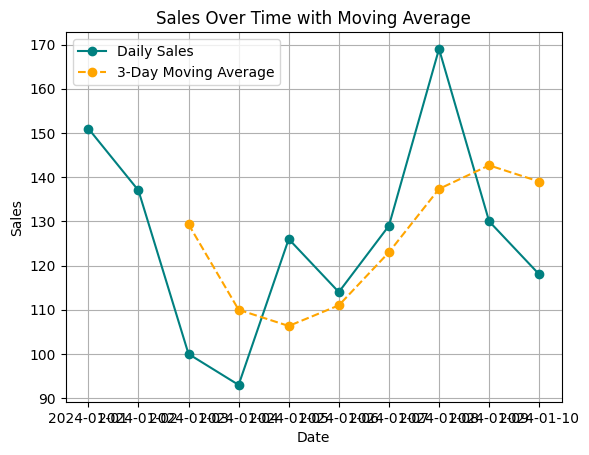

In [ ]:
#Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Calculate the 3-day moving average
ts_df["Moving_Avg"] = ts_df["Sales"].rolling(window=3).mean()

# Plot the original sales line
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Daily Sales")

# Plot the moving average line
plt.plot(ts_df["Date"], ts_df["Moving_Avg"], color="orange", linestyle="--", marker="o", label="3-Day Moving Average")

# Chart details
plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()



Section 5: Visualizing Geospatial Data

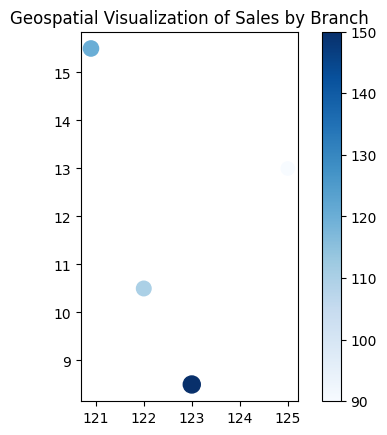

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

*Answer here

This visualization of the relation of the sales and the branch where in each color, and size represents the value, thus the south branch got the highest value which is 150 and it is the one who performs well in terms of the sales.

**Conclusion**

The geospatial visualization provides helpful view of how the sales relies across the different branch locations. Which represents the sales data on a map, it becomes efficient when identifying which areas do perform better and which may need some improvement. Overall, mapping sales geographically do offer a practical way to better understand how that the patterns and support strategic planning are better to correlate each other.